# Bluesky diode scan
We are going to do this and that
xchong@lbl.gov, awojdyla@lbl.gov, dec 2023

In [ ]:
import epics
import bluesky
import numpy as np

In [ ]:
from bluesky import RunEngine
RE = RunEngine({})

from databroker import Broker
db = Broker.named('temp')

# Insert all metadata/data captured into db.
RE.subscribe(db.insert)

0

The 1st experiment on 20231215 does not work well. There is no edge after we do angle scan. The (wrong) codes we use are as follows:

In [ ]:
#For the 1st experiment on 20231215, we use mono_angle_deg only (which does not work, no edge found)
pv_mono_angle_deg = 'bl531_xps1:mono_angle_deg'
pv_photodiode_mA  = 'bl201-beamstop:current'


# pv_m101_pitch_mm  = 'bl531_esp300:m101_pitch_mm'
# #pv_m101_bend_um   = 'bl531_esp300:m101_bend_um'
# pv_mono_height_mm = 'bl531_xps1:mono_height_mm'

In [ ]:
##d

In [ ]:
from ophyd import EpicsMotor
import ophyd
ophyd.set_cl('caproto')

#for diode_mA, use EpicsSignal() instead of EpicsMotor
diode_mA = ophyd.EpicsSignal('bl201-beamstop:current', name='photodiode') 
diode_mA.wait_for_connection(timeout=2.0)
diode_mA.read()

#create a motor for angle
mono_angle_deg = EpicsMotor(pv_mono_angle_deg, name='Mono theta deg')
mono_angle_deg.wait_for_connection(timeout=2.0)
mono_angle_deg.read()

OrderedDict([('Mono theta deg',
              {'value': 26.0, 'timestamp': 1703016511.921417}),
             ('Mono theta deg_user_setpoint',
              {'value': 26.0, 'timestamp': 1703016646.708014})])

In [ ]:
#run this line to check the value of photodiode everytime we change angle/pitch/height
diode_mA.read()

{'photodiode': {'value': -74.43, 'timestamp': 1703016652.825827}}

In [ ]:
#Run this line before starting angle scan, otherwise the edge does not look good
mono_angle_deg.move(25)

MoveStatus(done=True, pos=Mono theta deg, elapsed=0.0, success=True, settle_time=0.0)

In [ ]:
from bluesky.plans import count

dets = [diode_mA]   # a list of any number of detectors

RE(count(dets))

('499524b5-42b9-4eb4-beb3-d7b61a919edc',)

In [ ]:
# Run callback before scan, so that we can see the plot
from bluesky.callbacks.best_effort import BestEffortCallback
bec = BestEffortCallback()

# Send all metadata/data captured to the BestEffortCallback.
RE.subscribe(bec)

In [ ]:
# We cannot see the edge if directly run the following code.
from bluesky.plans import scan
RE(scan(dets, mono_angle_deg, 25, 26, 51))

On 20231219, we try to find the best height (41) and pitch values (0.25) before angle scan. After we find the values, we do angle scan again and see the edge.

In [ ]:
#For the 2nd experiment on 20231219, we first create a new motor mono_height_mm
pv_mono_height_mm = 'bl531_xps1:mono_height_mm'
mono_height_mm = EpicsMotor(pv_mono_height_mm, name='Mono height mm')
mono_height_mm.wait_for_connection(timeout=2.0)
mono_height_mm.read()

In [ ]:
#At first, we do not know the value for move(), just set it to 40. Then we use scan() to find the best value.
mono_height_mm.move(41)

MoveStatus(done=True, pos=Mono height mm, elapsed=0.9, success=True, settle_time=0.0)

In [ ]:
diode_mA.read()

{'photodiode': {'value': -67.09, 'timestamp': 1703017143.969778}}



Transient Scan ID: 13     Time: 2023-12-19 11:56:58
Persistent Unique Scan ID: '29fbd8d5-6b40-486c-b6a9-d463a5dd0fd3'
New stream: 'primary'
+-----------+------------+----------------+------------+
|   seq_num |       time | Mono height mm | photodiode |
+-----------+------------+----------------+------------+
|         1 | 11:56:58.6 |        40.0000 |         -4 |
|         2 | 11:56:59.4 |        40.1500 |         -4 |
|         3 | 11:57:00.3 |        40.3000 |         -5 |
|         4 | 11:57:01.2 |        40.4500 |        -19 |
|         5 | 11:57:02.0 |        40.6000 |        -40 |
|         6 | 11:57:02.9 |        40.7500 |        -40 |
|         7 | 11:57:03.8 |        40.9000 |        -64 |
|         8 | 11:57:04.7 |        41.0500 |        -75 |
|         9 | 11:57:05.5 |        41.2000 |        -76 |
|        10 | 11:57:06.4 |        41.3500 |        -76 |
|        11 | 11:57:07.3 |        41.5000 |        -48 |
|        12 | 11:57:08.2 |        41.6500 |         -5 |
|  

('29fbd8d5-6b40-486c-b6a9-d463a5dd0fd3',)

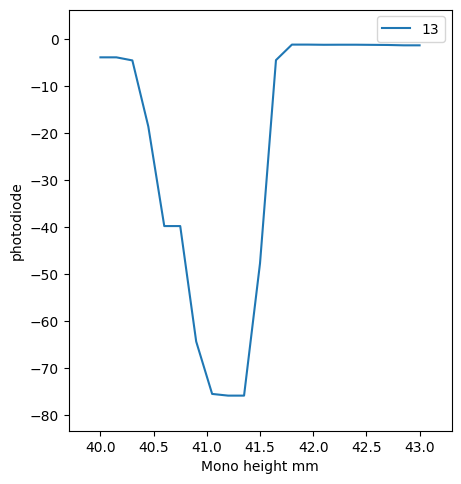

In [ ]:
#Through scanning, we find that the best height is around 41, hence we use mono_height_mm.move(41), then run diode_mA.read()
from bluesky.plans import scan
RE(scan(dets, mono_height_mm, 40, 43, 21))

In [ ]:
#for the 3rd experiment on 20231219, we create a new motor pv_m101_pitch_mm
pv_m101_pitch_mm  = 'bl531_esp300:m101_pitch_mm'

m101_pitch_mm = EpicsMotor(pv_m101_pitch_mm, name='M101 pitch mm')
m101_pitch_mm.wait_for_connection(timeout=2.0)
m101_pitch_mm.read()

In [ ]:
#set a initial value (e.g. 0.2)
m101_pitch_mm.move(0.25)

In [ ]:
#use scan() to find the best pitch value, which is 0.25
from bluesky.plans import scan
RE(scan(dets, m101_pitch_mm, 0.2, 0.3, 21))



Transient Scan ID: 2     Time: 2023-12-19 12:11:20
Persistent Unique Scan ID: 'b519dad2-2959-414c-a69d-c2dc30d917b1'
New stream: 'primary'
+-----------+------------+---------------+----------------+------------+
|   seq_num |       time | M101 pitch mm | Mono height mm | photodiode |
+-----------+------------+---------------+----------------+------------+
|         1 | 12:11:26.0 |       0.00002 |        40.0000 |         -2 |
|         2 | 12:11:27.0 |       0.00002 |        40.2000 |         -2 |
|         3 | 12:11:28.0 |       0.00002 |        40.4000 |         -2 |
|         4 | 12:11:29.0 |       0.00002 |        40.6000 |         -2 |
|         5 | 12:11:30.0 |       0.00002 |        40.8000 |         -2 |
|         6 | 12:11:31.0 |       0.00002 |        41.0000 |         -2 |
|         7 | 12:11:31.9 |       0.00002 |        41.2000 |         -2 |
|         8 | 12:11:33.0 |       0.00002 |        41.4000 |         -2 |
|         9 | 12:11:34.0 |       0.00002 |        41.600

('b519dad2-2959-414c-a69d-c2dc30d917b1',)

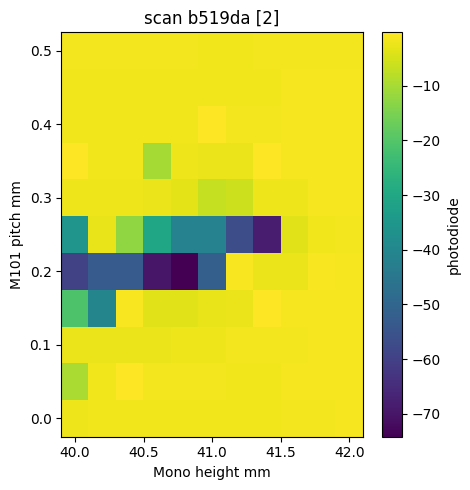

In [187]:
#For the 4th experiments on 20231219, we use 2Dscan (grid_scan) to find the pitch and height values at the same time.
#Through this experiment, we find that the pitch and height are 0.2 and 40.8, which are not accurate. We use 0.25 and 41 instead.
#useful link: https://nsls-ii.github.io/bluesky/tutorial.html#common-experiments-plans
from bluesky.plans import grid_scan
RE(grid_scan(dets,
             m101_pitch_mm, 0.0, 0.5, 11,  # scan motor1 from -1.5 to 1.5 in 3 steps
             mono_height_mm, 40, 42, 11  # scan motor2 from -0.1 to 0.1 in 5 steps
             ))  # scan motor3 from 10 to -10 in 5 steps

In [ ]:
# check the value (should be around -70) before angle scan
diode_mA.read()

In [ ]:
# After we set the height (41) and pitch (0.25) values, we can do deg scan now (just repeat the 1st experiment). Then we can see the edge.
mono_angle_deg.move(25)
from bluesky.plans import scan
RE(scan(dets, mono_angle_deg, 25, 26, 51))

In [128]:
#others:print the value (not used in this experiment)
header = db[-1]
header.table()
table = db[-1].table(fill=True)

,time,photodiode,M101 pitch mm,M101 pitch mm_user_setpoint
seq_num,,,,
1,2023-12-19 19:33:58.300783634,-539.6,0.000020,0.00
2,2023-12-19 19:34:01.862716436,-538.8,0.049980,0.05
3,2023-12-19 19:34:05.451926708,-539.5,0.099976,0.10
4,2023-12-19 19:34:09.038368225,-541.7,0.149980,0.15
5,2023-12-19 19:34:12.626232386,-558.9,0.199978,0.20
6,2023-12-19 19:34:16.231402397,-1068.2,0.249982,0.25
7,2023-12-19 19:34:19.787846088,-589.7,0.299974,0.30
8,2023-12-19 19:34:23.359917402,-540.6,0.349980,0.35
9,2023-12-19 19:34:26.898728609,-539.2,0.399978,0.40


In [ ]:
#Others: how to know the angle is around 25.5.
#useful link: https://henke.lbl.gov/optical_constants/filter2.html
#We can calculate the angle using equations as follows:

# #physical constants
# h_m2kgps = 6.6261e-34
# c_mps    = 299792458   
# e_eV     = 6.2415e+18
# # Silicon spacing (for Bragg condition)
# Si_m = 5.43E-10
# a_Si111_m = Si_m/np.sqrt(1^2+1^2+1^2)
# # Monochromotor offset
# mono_offset_deg = 12.787
# #Wavelength from energy
# lambda_m = lambda E_eV : h_m2kgps*c_mps*e_eV/E_eV
# #Bragg angle from Wavelength
# bragg_deg = lambda E_eV: np.arcsin(lambda_m(E_eV)/(2*a_Si111_m))*180/np.pi
# # Mono angle from Bragg angle
# mono_deg = lambda E_eV: bragg_deg(E_eV)+mono_offset_deg
# mono_deg(7000)